# Linear Algebra using SymPy


## Introduction

This notebook is a short tutorial of Linear Algebra calculation using SymPy. For further information refer to SymPy official [tutorial](http://docs.sympy.org/latest/tutorial/index.html).

You can also check the [SymPy in 10 minutes](./SymPy in 10 minutes.ipynb) tutorial.

In [1]:
from sympy import *
init_session()

IPython console for SymPy 1.0 (Python 2.7.13-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


A matrix $A \in \mathbb{R}^{m\times n}$ is a rectangular array of real number with $m$ rows and $n$ columns. To specify  a matrix $A$, we specify the values for its components as a list of lists:

In [2]:
A = Matrix([
        [3, 2, -1, 1],
        [2, -2, 4, -2],
        [-1, S(1)/2, -1, 0]])
display(A)

⎡3    2   -1  1 ⎤
⎢               ⎥
⎢2   -2   4   -2⎥
⎢               ⎥
⎣-1  1/2  -1  0 ⎦

We can access the matrix elements using square brackets, we can also use it for submatrices

In [3]:
A[0, 1] # row 0, column 1

In [4]:
A[0:2, 0:3] # top-left 2x3 submatrix

⎡3  2   -1⎤
⎢         ⎥
⎣2  -2  4 ⎦

We can also create some common matrices. Let us create an identity matrix

In [5]:
eye(2)

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [6]:
zeros(2, 3)

⎡0  0  0⎤
⎢       ⎥
⎣0  0  0⎦

We can use algebraic operations like addition $+$, substraction $-$, multiplication $*$, and exponentiation $**$ with ``Matrix`` objects.

In [7]:
B = Matrix([
        [2, -3, -8],
        [-2, -1, 2],
        [1, 0, -3]])
C = Matrix([
        [sin(x), exp(x**2), 1],
        [0, cos(x), 1/x],
        [1, 0, 2]])

In [8]:
B + C

⎡             ⎛ 2⎞            ⎤
⎢             ⎝x ⎠            ⎥
⎢sin(x) + 2  ℯ     - 3    -7  ⎥
⎢                             ⎥
⎢                            1⎥
⎢    -2      cos(x) - 1  2 + ─⎥
⎢                            x⎥
⎢                             ⎥
⎣    2           0        -1  ⎦

In [9]:
B ** 2

⎡2   -3  2⎤
⎢         ⎥
⎢0   7   8⎥
⎢         ⎥
⎣-1  -3  1⎦

In [10]:
C ** 2

⎡                                                        ⎛ 2⎞⎤
⎢              ⎛ 2⎞           ⎛ 2⎞                       ⎝x ⎠⎥
⎢   2          ⎝x ⎠           ⎝x ⎠                      ℯ    ⎥
⎢sin (x) + 1  ℯ    ⋅sin(x) + ℯ    ⋅cos(x)  sin(x) + 2 + ─────⎥
⎢                                                         x  ⎥
⎢                                                            ⎥
⎢     1                    2                   cos(x)   2    ⎥
⎢     ─                 cos (x)                ────── + ─    ⎥
⎢     x                                          x      x    ⎥
⎢                                                            ⎥
⎢                         ⎛ 2⎞                               ⎥
⎢                         ⎝x ⎠                               ⎥
⎣sin(x) + 2              ℯ                         5         ⎦

In [11]:
tan(x) * B ** 5

⎡52⋅tan(x)  27⋅tan(x)  -28⋅tan(x)⎤
⎢                                ⎥
⎢-2⋅tan(x)   -tan(x)   -78⋅tan(x)⎥
⎢                                ⎥
⎣11⋅tan(x)  30⋅tan(x)  57⋅tan(x) ⎦

And the ``transpose`` of the matrix, that flips the matrix through its main diagonal:

In [12]:
A.transpose() # the same as A.T

⎡3   2   -1 ⎤
⎢           ⎥
⎢2   -2  1/2⎥
⎢           ⎥
⎢-1  4   -1 ⎥
⎢           ⎥
⎣1   -2   0 ⎦

## Row operations

In [13]:
M = eye(4)

In [14]:
M[1, :] = M[1, :] + 5*M[0, :]

In [15]:
M

⎡1  0  0  0⎤
⎢          ⎥
⎢5  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

The notation ``M[1, :]`` refers to entire rows of the matrix. The first argument specifies the 0-based row index, for example the first row of ``M`` is ``M[0, :]``. The code example above implements the row operation $R_2 \leftarrow R_2 + 5R_1$. To scale a row by a constant $c$, use the ``M[1, :] = c*M[1, :]``. To swap rows $1$ and $j$, we can use the Python tuple-assignment syntax ``M[1, :], M[j, :] = M[j, :], M[1, :]``.

## Reduced row echelon form

The Gauss-Jordan elimination procedure is a sequence of row operations that can be performed on any matrix to bring it to its _reduced row echelon form_ (RREF). In Sympy, matrices have a ``rref`` method that compute it:

In [16]:
A.rref()

⎛⎡1  0  0  1 ⎤, [0, 1, 2]⎞
⎜⎢           ⎥           ⎟
⎜⎢0  1  0  -2⎥           ⎟
⎜⎢           ⎥           ⎟
⎝⎣0  0  1  -2⎦           ⎠

It return a tuple, the first value is the RREF of the matrix $A$, and the second tells the location of the leading ones (pivots). If we just want the RREF, we can just get the first entry of the matrix, i.e.

In [17]:
A.rref()[0]

⎡1  0  0  1 ⎤
⎢           ⎥
⎢0  1  0  -2⎥
⎢           ⎥
⎣0  0  1  -2⎦

## Matrix fundamental spaces

Consider the matrix $A \in \mathbb{R}^{m\times n}$. The fundamental spaces of a matrix are its column space $\mathcal{C}(A)$, its null space $\mathcal{N}(A)$, and its row space $\mathcal{R}(A)$. These vector spaces are importan when we consider the matrix product $A\mathbf{x} = \mathbf{y}$ as a linear transformation $T_A:\mathbb{R}^n\rightarrow \mathbb{R}^n$ of the input vector $\mathbf{x}\in\mathbb{R}^n$ to produce an output vector $\mathbf{y} \in \mathbb{R}^m$.

**Linear transformations** $T_A: \mathbb{R}^n \rightarrow \mathbb{R}^m$ can be represented as $m\times n$ matrices. The fundamental spaces of a matrix $A$ gives us information about the domain and image of the linear transformation $T_A$. The column space $\mathcal{C}(A)$ is the same as the image space $\mathrm{Im}(T_A)$ (the set of all possible outputs). The null space $\mathcal{N}(A)$ is also called kernel $\mathrm{Ker}(T_A)$, and is the set of all input vectors that are mapped to the zero vector. The row space $\mathcal{R}(A)$ is the orthogonal complement of the null space, i.e., the vectors that are mapped to vectors different from zero. Input vectors in the row space of $A$ are in a one-to-one correspondence with the output vectors in the column space of $A$.

Let us see how to compute these spaces, or a base for them!

The non-zero rows in the reduced row echelon form $A$ are a basis for its row space, i.e.

In [18]:
[A.rref()[0][row, :] for row in A.rref()[1]]

[[1  0  0  1], [0  1  0  -2], [0  0  1  -2]]

The column space of $A$ is the span of the columns of $A$ that contain the pivots.

In [19]:
[A[:, col] for col in A.rref()[1]]

⎡⎡3 ⎤, ⎡ 2 ⎤, ⎡-1⎤⎤
⎢⎢  ⎥  ⎢   ⎥  ⎢  ⎥⎥
⎢⎢2 ⎥  ⎢-2 ⎥  ⎢4 ⎥⎥
⎢⎢  ⎥  ⎢   ⎥  ⎢  ⎥⎥
⎣⎣-1⎦  ⎣1/2⎦  ⎣-1⎦⎦

We can also use the ``columnspace`` method

In [20]:
A.columnspace()

⎡⎡3 ⎤, ⎡ 2 ⎤, ⎡-1⎤⎤
⎢⎢  ⎥  ⎢   ⎥  ⎢  ⎥⎥
⎢⎢2 ⎥  ⎢-2 ⎥  ⎢4 ⎥⎥
⎢⎢  ⎥  ⎢   ⎥  ⎢  ⎥⎥
⎣⎣-1⎦  ⎣1/2⎦  ⎣-1⎦⎦

Note that we took columns from the original matrix and not from its RREF.

To find (a base for) the null space of $A$ we use the ``nullspace`` method:

In [21]:
A.nullspace()

⎡⎡-1⎤⎤
⎢⎢  ⎥⎥
⎢⎢2 ⎥⎥
⎢⎢  ⎥⎥
⎢⎢2 ⎥⎥
⎢⎢  ⎥⎥
⎣⎣1 ⎦⎦

## Determinants

The determinant of a matrix, denoted by $\det(A)$ or $|A|$, isis a useful value that can be computed from the elements of a square matrix. It can be viewed as the scaling factor of the transformation described by the matrix.

In [22]:
M = Matrix([
        [1, 2, 2],
        [4, 5, 6],
        [7, 8, 9]])

In [23]:
M.det()

## Matrix inverse

For invertible matrices (those with $\det(A)\neq 0$), there is an inverse matrix $A^{-1}$ that have the _inverse_ effect (if we are thinking about linear transformations).

In [24]:
A = Matrix([
        [1, -1, -1],
        [0, 1, 0],
        [1, -2, 1]])

In [25]:
A.inv()

⎡1/2   3/2  1/2⎤
⎢              ⎥
⎢ 0     1    0 ⎥
⎢              ⎥
⎣-1/2  1/2  1/2⎦

In [26]:
A.inv() * A

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [27]:
A * A.inv()

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

## Eigenvectors and Eigenvalues

To find the eigenvalues of a matrix, use ``eigenvals``. ``eigenvals`` returns a dictionary of ``eigenvalue:algebraic multiplicity``.

In [28]:
M = Matrix([
        [3, -2,  4, -2],
        [5,  3, -3, -2],
        [5, -2,  2, -2],
        [5, -2, -3,  3]])

M

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

In [29]:
M.eigenvals()

This means that ``M`` has eigenvalues -2, 3, and 5, and that the eigenvalues -2 and 3 have algebraic multiplicity 1 and that the eigenvalue 5 has algebraic multiplicity 2.

To find the eigenvectors of a matrix, use ``eigenvects``. ``eigenvects`` returns a list of tuples of the form ``(eigenvalue:algebraic multiplicity, [eigenvectors])``.

In [30]:
M.eigenvects()

⎡⎛-2, 1, ⎡⎡0⎤⎤⎞, ⎛3, 1, ⎡⎡1⎤⎤⎞, ⎛5, 2, ⎡⎡1⎤, ⎡0 ⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢-1⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢0 ⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠⎦

This shows us that, for example, the eigenvalue 5 also has geometric multiplicity 2, because it has two eigenvectors. Because the algebraic and geometric multiplicities are the same for all the eigenvalues, ``M`` is diagonalizable.

To diagonalize a matrix, use diagonalize. diagonalize returns a tuple $(P,D)$, where $D$ is diagonal and $M=PDP^{−1}$.

In [31]:
P, D = M.diagonalize()

In [32]:
P

⎡0  1  1  0 ⎤
⎢           ⎥
⎢1  1  1  -1⎥
⎢           ⎥
⎢1  1  1  0 ⎥
⎢           ⎥
⎣1  1  0  1 ⎦

In [33]:
D

⎡-2  0  0  0⎤
⎢           ⎥
⎢0   3  0  0⎥
⎢           ⎥
⎢0   0  5  0⎥
⎢           ⎥
⎣0   0  0  5⎦

In [34]:
P * D * P.inv()

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

In [35]:
P * D * P.inv() == M

True

Note that since ``eigenvects`` also includes the ``eigenvalues``, you should use it instead of ``eigenvals`` if you also want the ``eigenvectors``. However, as computing the eigenvectors may often be costly, ``eigenvals`` should be preferred if you only wish to find the eigenvalues.

If all you want is the characteristic polynomial, use ``charpoly``. This is more efficient than ``eigenvals``, because sometimes symbolic roots can be expensive to calculate.

In [36]:
lamda = symbols('lamda')
p = M.charpoly(lamda)
factor(p)

**Note:** ``lambda`` is a reserved keyword in Python, so to create a Symbol called λ, while using the same names for SymPy Symbols and Python variables, use ``lamda`` (without the b). It will still pretty print as λ.

Non-square matrices don’t have eigenvectors and therefore don’t
have an eigendecomposition. Instead, we can use the singular value
decomposition to break up a non-square matrix A into left singular
vectors, right singular vectors, and a diagonal matrix of singular
values. Use the singular_values method on any matrix to find its
singular values.

In [37]:
A

⎡1  -1  -1⎤
⎢         ⎥
⎢0  1   0 ⎥
⎢         ⎥
⎣1  -2  1 ⎦

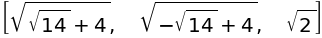

In [38]:
A.singular_values()

## References

1. SymPy Development Team (2016). [Sympy Tutorial: Matrices](http://docs.sympy.org/latest/tutorial/matrices.html)
2. Ivan Savov (2016). [Taming math and physics using SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf)

The following cell change the style of the notebook.

In [39]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()